# Clustering Models

In [123]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MiniBatchKMeans

from sklearn.cluster import SpectralClustering

from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

from sklearn.cluster import estimate_bandwidth

import random 

import warnings
warnings.filterwarnings("ignore")

## K Means Clustering

In [3]:
iris_df = pd.read_csv('datasets/iris.csv', 
                      skiprows=1, 
                      names = ['sepal-length',
                               'sepal-width',
                               'petal-length',
                               'petal-width',
                               'class'])

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris_df.shape

(150, 5)

In [4]:
# Shuffle the data
iris_df = iris_df.sample(frac=1).reset_index(drop=True)
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,6.7,3.1,4.4,1.4,Iris-versicolor
1,7.9,3.8,6.4,2.0,Iris-virginica
2,5.4,3.7,1.5,0.2,Iris-setosa
3,7.2,3.2,6.0,1.8,Iris-virginica
4,6.2,2.9,4.3,1.3,Iris-versicolor


In [7]:
# Check for nuls
iris_df.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

In [9]:
# Check the unique values
iris_df['class'].unique()

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa'], dtype=object)

In [10]:
# Convert to numerical values
label_encoding = preprocessing.LabelEncoder()
iris_df['class'] = label_encoding.fit_transform(iris_df['class'].astype(str))
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,6.7,3.1,4.4,1.4,1
1,7.9,3.8,6.4,2.0,2
2,5.4,3.7,1.5,0.2,0
3,7.2,3.2,6.0,1.8,2
4,6.2,2.9,4.3,1.3,1


In [11]:
iris_df.describe()

,sepal-length,sepal-width,petal-length,petal-width,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


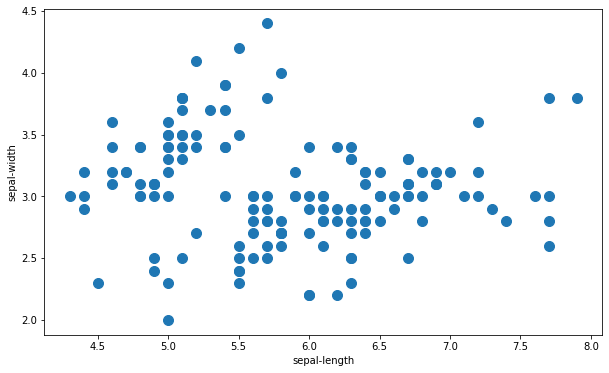

In [16]:
# Plot the sepal length against sepal width
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(iris_df['sepal-length'], iris_df['sepal-width'], s=100)
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

plt.show()

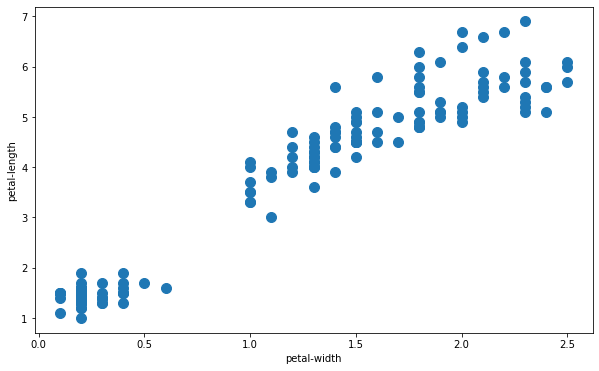

In [18]:
# Plot petal width against petal length
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(iris_df['petal-width'], iris_df['petal-length'], s=100)
plt.xlabel('petal-width')
plt.ylabel('petal-length')

plt.show()

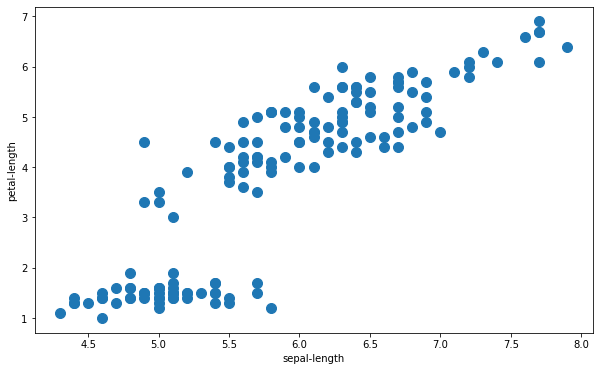

In [21]:
# Plot sepal length against petal length
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(iris_df['sepal-length'], iris_df['petal-length'], s=100)
plt.xlabel('sepal-length')
plt.ylabel('petal-length')

plt.show()

The third graph showing sepal length against petal length seems to have three distinct clusters indicating this would be the best combination to cluster using kmeans.

In [22]:
# Create a new dataframe with the two features of interest
iris2 = iris_df[['sepal-length', 'petal-length']]
iris2.sample(5)

,sepal-length,petal-length
21,5.0,1.6
112,5.6,4.1
126,5.0,1.4
88,5.5,4.0
46,5.0,3.3


In [24]:
# Convert to an array
iris2 = np.array(iris2)

In [27]:
# Create a kmeans model
kmeans_model = KMeans(n_clusters=3, max_iter=1000).fit(iris2)

In [28]:
# Look at the predicted labels
kmeans_model.labels_

array([2, 1, 0, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 0,
       1, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 2, 1,
       0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 2, 2,
       2, 0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 0, 0, 2,
       2, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2,
       0, 2, 0, 2, 2, 1, 2, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2])

In [29]:
# Show the centroids
centroids = kmeans_model.cluster_centers_
centroids

array([[5.00784314, 1.49411765],
       [6.83902439, 5.67804878],
       [5.87413793, 4.39310345]])

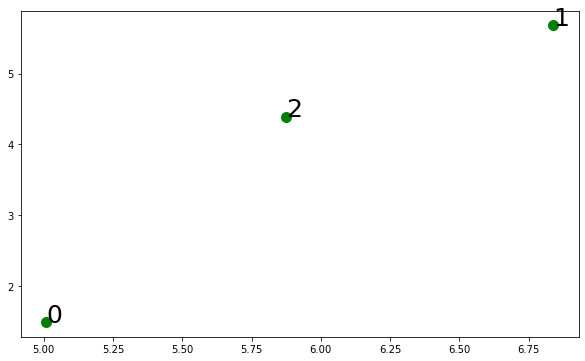

In [34]:
# Plot the centroids
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(centroids[:,0], centroids[:,1], c='g', s=100, marker='o')
for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0], centroids[i][1]), fontsize=25)

In [37]:
# Define the original labels
iris_labels = iris_df['class']
iris_labels.head()

0    1
1    2
2    0
3    2
4    1
Name: class, dtype: int32

In [40]:
# Get the evaluation metrics
print("Homogeneity_score: ", metrics.homogeneity_score(iris_labels, kmeans_model.labels_))
print("Completeness_score: ", metrics.completeness_score(iris_labels, kmeans_model.labels_))
print("v_measure_score: ", metrics.v_measure_score(iris_labels, kmeans_model.labels_))
print("Adjusted_rand_score: ", metrics.adjusted_rand_score(iris_labels, kmeans_model.labels_))
print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(iris_labels,  kmeans_model.labels_))
print("Silhouette_score: ", metrics.silhouette_score(iris2, kmeans_model.labels_))

Homogeneity_score:  0.7033177646052958
Completeness_score:  0.7096993707802843
v_measure_score:  0.706494157075837
Adjusted_rand_score:  0.6988627672348092
Adjusted_mutual_info_score:  0.7028024531409133
Silhouette_score:  0.5890612473759282


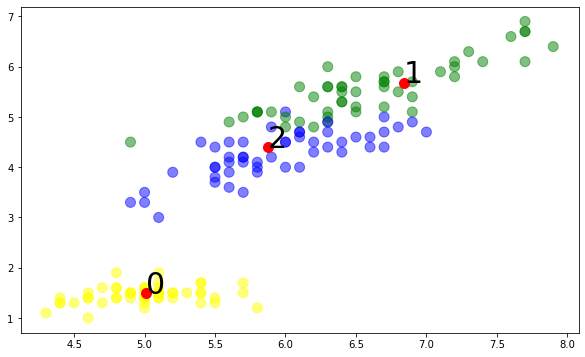

In [47]:
# Plot the original points and the centroids on a chart
colors = ['yellow','blue','green']
plt.figure(figsize=(10,6))
plt.scatter(iris_df['sepal-length'], iris_df['petal-length'], c=iris_df['class'], s=100,
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=100, marker='o')
for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0], centroids[i][1]), fontsize=30)

The clusters are reasonable.

### Use more features

In [48]:
# Drop the class
iris_features = iris_df.drop('class', axis=1)
iris_features.head()

,sepal-length,sepal-width,petal-length,petal-width
0,6.7,3.1,4.4,1.4
1,7.9,3.8,6.4,2.0
2,5.4,3.7,1.5,0.2
3,7.2,3.2,6.0,1.8
4,6.2,2.9,4.3,1.3


In [49]:
iris_labels = iris_df['class']
iris_labels.sample(5)

125    2
141    2
8      2
74     0
102    1
Name: class, dtype: int32

In [50]:
kmeans_model = KMeans(n_clusters=3).fit(iris_features)

In [51]:
kmeans_model.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [52]:
print("Homogeneity_score: ", metrics.homogeneity_score(iris_labels, kmeans_model.labels_))
print("Completeness_score: ", metrics.completeness_score(iris_labels, kmeans_model.labels_))
print("v_measure_score: ", metrics.v_measure_score(iris_labels, kmeans_model.labels_))
print("Adjusted_rand_score: ", metrics.adjusted_rand_score(iris_labels, kmeans_model.labels_))
print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(iris_labels,  kmeans_model.labels_))
print("Silhouette_score: ", metrics.silhouette_score(iris_features, kmeans_model.labels_))

Homogeneity_score:  0.7514854021988338
Completeness_score:  0.7649861514489815
v_measure_score:  0.7581756800057784
Adjusted_rand_score:  0.7302382722834697
Adjusted_mutual_info_score:  0.7551191675800483
Silhouette_score:  0.5525919445499757


Adding more features has improved the scores which rely on labels. The silhouette score has fallen a bit from the smaller model.

In [56]:
iris_df = pd.read_csv('datasets/iris.csv', 
                      skiprows=1, 
                      names = ['sepal-length',
                               'sepal-width',
                               'petal-length',
                               'petal-width',
                               'class'])

In [59]:
label_encoding = preprocessing.LabelEncoder()
iris_df['class'] = label_encoding.fit_transform(iris_df['class'].astype(str))
iris_features = iris_df.drop('class', axis=1)
iris_labels = iris_df['class']

In [60]:
iris_features.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [63]:
iris_labels.sample(5)

110    2
95     1
46     0
123    2
120    2
Name: class, dtype: int32

In [64]:
# Function to apply the models

def build_model(clustering_model, data, labels):
    
    model = clustering_model(data)

    print('homo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
    print(50 * '-')
    
    print('%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          %(metrics.homogeneity_score(labels, model.labels_),
            metrics.completeness_score(labels, model.labels_),
            metrics.v_measure_score(labels, model.labels_),
            metrics.adjusted_rand_score(labels, model.labels_),
            metrics.adjusted_mutual_info_score(labels,  model.labels_),
            metrics.silhouette_score(data, model.labels_)))

In [65]:
# K Means function
def k_means(data, n_clusters=3, max_iter=1000):
    model = KMeans(n_clusters=n_clusters, max_iter=max_iter).fit(data)
    
    return model

In [66]:
build_model(k_means, iris_features, iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.751	0.765	0.758	0.730	0.755	0.553


### Agglomerative

In [67]:
def agglomerative_fn(data, n_clusters=3):
    model = AgglomerativeClustering(n_clusters = n_clusters).fit(data)
    
    return model

In [68]:
build_model(agglomerative_fn, iris_features, iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.761	0.780	0.770	0.731	0.767	0.554


### DB Scan

In [69]:
def dbscan_fn(data, eps=0.45, min_samples=4):
    model = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    return model

In [70]:
build_model(dbscan_fn, iris_features, iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.577	0.609	0.593	0.508	0.584	0.372


### Mean Shift

In [71]:
def mean_shift_fn(data, bandwidth=0.85):
    model = MeanShift(bandwidth=bandwidth).fit(data)
    return model

In [72]:
build_model(mean_shift_fn, iris_features, iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.760	0.772	0.766	0.744	0.763	0.551


### BIRCH

In [81]:
def birch_fn(data, n_clusters=3):
    model = Birch(n_clusters=n_clusters).fit(data)
    return model

In [82]:
build_model(birch_fn, iris_features, iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.675	0.738	0.705	0.610	0.701	0.502


### Affinity Propagation

In [83]:
def affinity_propagation_fn(data, damping=0.6, max_iter=1000):
    model = AffinityPropagation(damping=damping, max_iter=max_iter).fit(data)
    return model

In [84]:
build_model(affinity_propagation_fn, iris_features, iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.851	0.492	0.623	0.437	0.612	0.349


### K Means mini-batch

In [77]:
def mini_batch_kmeans_fn(data, n_clusters=3, max_iter=1000):
    model = MiniBatchKMeans(n_clusters=n_clusters, max_iter=max_iter, batch_size=20).fit(data)
    return model

In [78]:
build_model(mini_batch_kmeans_fn, iris_features, iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.751	0.765	0.758	0.730	0.755	0.553


### Spectral Clustering

In [85]:
SS = 1000 # self similarity
IS = 10 # intra cluster similarity
LS = 0.01 # low similarity

In [86]:
# create the precomputed similarity matrix - each row corresponds to a datapoint
similarity_mat = [[SS, IS, IS, LS, LS, LS, LS, LS, LS],
                  [IS, SS, IS, LS, LS, LS, LS, LS, LS],
                  [IS, IS, SS, LS, LS, LS, LS, LS, LS],
                  [LS, LS, LS, SS, IS, IS, LS, LS, LS],
                  [LS, LS, LS, IS, SS, IS, LS, LS, LS],
                  [LS, LS, LS, IS, IS, SS, LS, LS, LS],
                  [LS, LS, LS, LS, LS, LS, SS, IS, IS],
                  [LS, LS, LS, LS, LS, LS, IS, SS, IS],
                  [LS, LS, LS, LS, LS, LS, IS, IS, SS]] 

In [87]:
spectral_model = SpectralClustering(n_clusters=3, affinity='precomputed').fit(similarity_mat)

In [88]:
spectral_model.labels_

array([2, 2, 2, 1, 1, 1, 0, 0, 0])

## Hyperparameter Tuning

In [104]:
# Drivers dataset showing speed and distance for a number of drivers
drivers_df = pd.read_csv('datasets/driver_details.csv')
drivers_df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [105]:
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Driver_ID         4000 non-null   int64  
 1   Distance_Feature  4000 non-null   float64
 2   Speeding_Feature  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [106]:
drivers_df.isnull().sum()

Driver_ID           0
Distance_Feature    0
Speeding_Feature    0
dtype: int64

In [91]:
# Drop the ID to get the features of the model
drivers_features = drivers_df.drop('Driver_ID', axis=1)

### K Means

In [111]:
# Parameter grid used for unsupervised learning rather than grid search. Set the numbers of clusters to try
parameters = {'n_clusters': [2, 3, 4, 5, 10, 20, 30]}
parameter_grid = ParameterGrid(parameters)

In [112]:
# List the only hyperparameter - number of clusters
list(parameter_grid)

[{'n_clusters': 2},
 {'n_clusters': 3},
 {'n_clusters': 4},
 {'n_clusters': 5},
 {'n_clusters': 10},
 {'n_clusters': 20},
 {'n_clusters': 30}]

In [95]:
# Initialize the best score to -1 as the value to beat with the model
best_score = -1
model = KMeans()

In [96]:
# Run through the values (** unpacks dictionary values to another dictionary)
for g in parameter_grid:
    model.set_params(**g)
    model.fit(drivers_features)

    ss = metrics.silhouette_score(drivers_features, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'n_clusters': 2} Score:  0.8490223286225532
Parameter:  {'n_clusters': 3} Score:  0.8231396834167266
Parameter:  {'n_clusters': 4} Score:  0.5909287904994066
Parameter:  {'n_clusters': 5} Score:  0.5124962013125903
Parameter:  {'n_clusters': 10} Score:  0.43622597638847754
Parameter:  {'n_clusters': 20} Score:  0.3878070077599701
Parameter:  {'n_clusters': 30} Score:  0.3378528371102885


In [97]:
best_grid

{'n_clusters': 2}

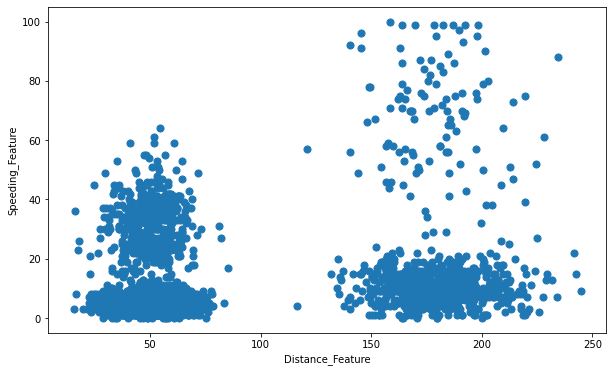

In [119]:
# Plot the original points
fig, ax = plt.subplots(figsize=(10,6))

plt.scatter(drivers_features['Distance_Feature'], 
            drivers_features['Speeding_Feature'], s=50)

plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')

plt.show()

### DB Scan

In [101]:
# Hyperparameters are eps and min_samples
parameters = {'eps': [0.9, 1.0, 5.0, 10.0, 12.0, 14.0, 20.0],
              'min_samples': [5, 7, 10, 12]}

parameter_grid = ParameterGrid(parameters)
list(parameter_grid)

[{'eps': 0.9, 'min_samples': 5},
 {'eps': 0.9, 'min_samples': 7},
 {'eps': 0.9, 'min_samples': 10},
 {'eps': 0.9, 'min_samples': 12},
 {'eps': 1.0, 'min_samples': 5},
 {'eps': 1.0, 'min_samples': 7},
 {'eps': 1.0, 'min_samples': 10},
 {'eps': 1.0, 'min_samples': 12},
 {'eps': 5.0, 'min_samples': 5},
 {'eps': 5.0, 'min_samples': 7},
 {'eps': 5.0, 'min_samples': 10},
 {'eps': 5.0, 'min_samples': 12},
 {'eps': 10.0, 'min_samples': 5},
 {'eps': 10.0, 'min_samples': 7},
 {'eps': 10.0, 'min_samples': 10},
 {'eps': 10.0, 'min_samples': 12},
 {'eps': 12.0, 'min_samples': 5},
 {'eps': 12.0, 'min_samples': 7},
 {'eps': 12.0, 'min_samples': 10},
 {'eps': 12.0, 'min_samples': 12},
 {'eps': 14.0, 'min_samples': 5},
 {'eps': 14.0, 'min_samples': 7},
 {'eps': 14.0, 'min_samples': 10},
 {'eps': 14.0, 'min_samples': 12},
 {'eps': 20.0, 'min_samples': 5},
 {'eps': 20.0, 'min_samples': 7},
 {'eps': 20.0, 'min_samples': 10},
 {'eps': 20.0, 'min_samples': 12}]

In [102]:
model = DBSCAN()
best_score = -1

In [103]:
# Run through all the combinations and fit on the model
for g in parameter_grid:
    model.set_params(**g)
    model.fit(drivers_features)

    ss = metrics.silhouette_score(drivers_features, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'eps': 0.9, 'min_samples': 5} Score:  -0.6057173612292268
Parameter:  {'eps': 0.9, 'min_samples': 7} Score:  -0.4265046999507063
Parameter:  {'eps': 0.9, 'min_samples': 10} Score:  -0.39254168253371013
Parameter:  {'eps': 0.9, 'min_samples': 12} Score:  -0.4286838741223884
Parameter:  {'eps': 1.0, 'min_samples': 5} Score:  -0.6155746493060738
Parameter:  {'eps': 1.0, 'min_samples': 7} Score:  -0.41637001640330673
Parameter:  {'eps': 1.0, 'min_samples': 10} Score:  -0.3837814631696031
Parameter:  {'eps': 1.0, 'min_samples': 12} Score:  -0.38648235283744914
Parameter:  {'eps': 5.0, 'min_samples': 5} Score:  0.31011275260225
Parameter:  {'eps': 5.0, 'min_samples': 7} Score:  0.7820011223700856
Parameter:  {'eps': 5.0, 'min_samples': 10} Score:  0.7974222681120255
Parameter:  {'eps': 5.0, 'min_samples': 12} Score:  0.7914367881923341
Parameter:  {'eps': 10.0, 'min_samples': 5} Score:  0.7598056658175874
Parameter:  {'eps': 10.0, 'min_samples': 7} Score:  0.8157570071704705
Par

In [115]:
# Find the parameters with the highest silhouette score
best_grid

{'eps': 20.0, 'min_samples': 5}

In [116]:
# Set these into the model and fit
model.set_params(**best_grid)
model.fit(drivers_features)

DBSCAN(eps=20.0)

In [117]:
# Find those that the model has NOT labelled as -1 which should give the cluster size
n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
n_clusters

2

In [118]:
# All values considered outliers are labelled with -1
n_noise = list(model.labels_).count(-1)
n_noise

0

### Fit another DB Scan Model with Different Hyperparameters

In [120]:
# Alternative model 1
another_grid = {'eps': 5.0, 'min_samples': 5}

model.set_params(**another_grid)
model.fit(drivers_features)

n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
print('Number of clusters: ', n_clusters)

n_noise = list(model.labels_).count(-1)
print('Noisy points: ', n_noise)

Number of clusters:  7
Noisy points:  117


In [122]:
# Alternative model 2
another_grid = {'eps': 5.0, 'min_samples': 7}

model.set_params(**another_grid)
model.fit(drivers_features)

n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
print('Number of clusters: ', n_clusters)

n_noise = list(model.labels_).count(-1)
print('Noisy points: ', n_noise)

Number of clusters:  3
Noisy points:  157


### Mean Shift Clustering

In [125]:
# One hyperparameter which is the bandwidth - bhe best possible result
estimate_bandwidth(drivers_features)

33.960524729584314

In [126]:
# Use in the model
model = MeanShift(bandwidth=estimate_bandwidth(drivers_features)).fit(drivers_features)
metrics.silhouette_score(drivers_features, model.labels_)

0.8231396834167266

## Example using Image Data

In [127]:
# Bring in the mnist dataset from csv
mnist_data = pd.read_csv('datasets/train.csv')
mnist_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
# Columns are 28 x 28 pixels flattened out
mnist_data.shape

(42000, 785)

In [129]:
sorted(mnist_data['label'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [130]:
# Get the feature set by dropping the label
mnist_features = mnist_data.drop('label', axis=1)
mnist_features.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
# Set the labels as a separate series
mnist_labels = mnist_data['label']
mnist_labels.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [132]:
# Takes the index of the image, prints the label and use matplotlib to display. Reshape to 28 by 28 pixels
def display_image(index):
    print("Digit: ", mnist_labels[index])
    plt.imshow(mnist_features.loc[index].values.reshape(28,28), cmap='Greys')

Digit:  8


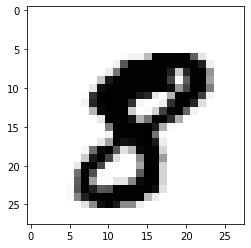

In [133]:
display_image(10)

In [134]:
# Set up the kmeans model
kmeans_model = KMeans(n_clusters=10, max_iter=1000).fit(mnist_features)
kmeans_centroids = kmeans_model.cluster_centers_

kmeans_centroids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [135]:
# There are ten cluster centres and each has 784 pixels
kmeans_centroids.shape

(10, 784)

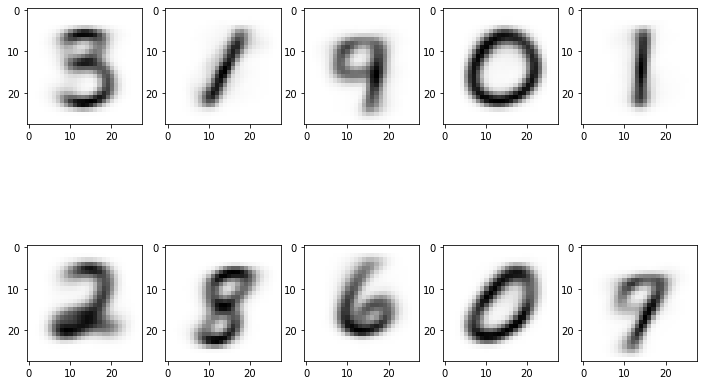

In [136]:
# Iterate through each centroid image and show each. Note that not all digits are represented!
fig, ax = plt.subplots(figsize=(12, 8))

for centroid in range(len(kmeans_centroids)):
    plt.subplot(2, 5, centroid + 1)

    plt.imshow(kmeans_centroids[centroid].reshape(28, 28), cmap='Greys')

In [137]:
np.unique(kmeans_model.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [138]:
# Set up a test set from a sample of the data
mnist_test = mnist_data.sample(10, replace=False)
mnist_test_features = mnist_test.drop('label', axis=1)
mnist_test_labels = mnist_test['label']

In [139]:
# Convert to array
mnist_test_labels = np.array(mnist_test_labels)
mnist_test_labels

array([4, 1, 9, 3, 3, 2, 9, 2, 9, 5], dtype=int64)

In [140]:
# Predict the cluster value for each datapoint
pred_clusters = kmeans_model.predict(mnist_test_features)

In [141]:
# Compare the predicted values with the actual label
pred_results = pd.DataFrame({'actual_digit': mnist_test_labels,
                             'pred_cluster': pred_clusters})

pred_results.head(10)

,actual_digit,pred_cluster
0,4,2
1,1,4
2,9,2
3,3,6
4,3,0
5,2,5
6,9,2
7,2,5
8,9,2
9,5,6


Example - first row the actual digit is 4 and the predicted cluster is 2. The image associated with cluster 2 is a 9.
Second row - the actual digit is 1 and the cluster is 4 which represents a 1.

## Mini Batch K Means

In [142]:
minibatch_kmeans_model = MiniBatchKMeans(n_clusters=10, max_iter=10000, batch_size=100).fit(mnist_features)

In [143]:
minibatch_kmeans_centroids = kmeans_model.cluster_centers_

minibatch_kmeans_centroids.shape

(10, 784)

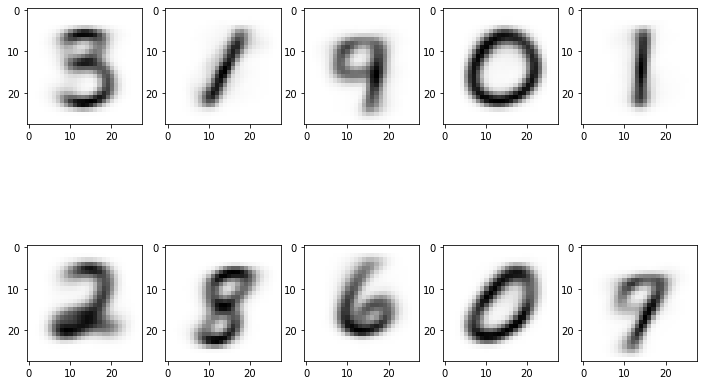

In [144]:
fig, ax = plt.subplots(figsize=(12, 8))

for centroid in range(len(minibatch_kmeans_centroids)):
    plt.subplot(2, 5, centroid + 1)

    plt.imshow(minibatch_kmeans_centroids[centroid].reshape(28, 28), cmap='Greys')

Very similar to the K Means centroids